In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width = 10, repr.plot.height = 5)

In [3]:
experiments = read_csv("../scripts/experiments/2020-09-03.csv", 
                       col_types = cols(experiment = col_factor())) %>% 
arrange(experiment, epoch)

experiments %>% dim()
experiments %>% head()

[1] 12 10

experiment,embedding_dim,hidden_dim,layers,lr,training_epochs,batch_size,training_time,epoch,loss
1,5,2,2,1e-05,2,5,20.45354,0,4.612810
1,5,2,2,1e-05,2,5,20.45354,1,4.612139
2,2,6,2,1e-03,2,10,27.60771,0,4.841485
2,2,6,2,1e-03,2,10,27.60771,1,4.782013
0,8,8,3,1e-04,2,4,29.84897,0,4.895028
0,8,8,3,1e-04,2,4,29.84897,1,4.880733


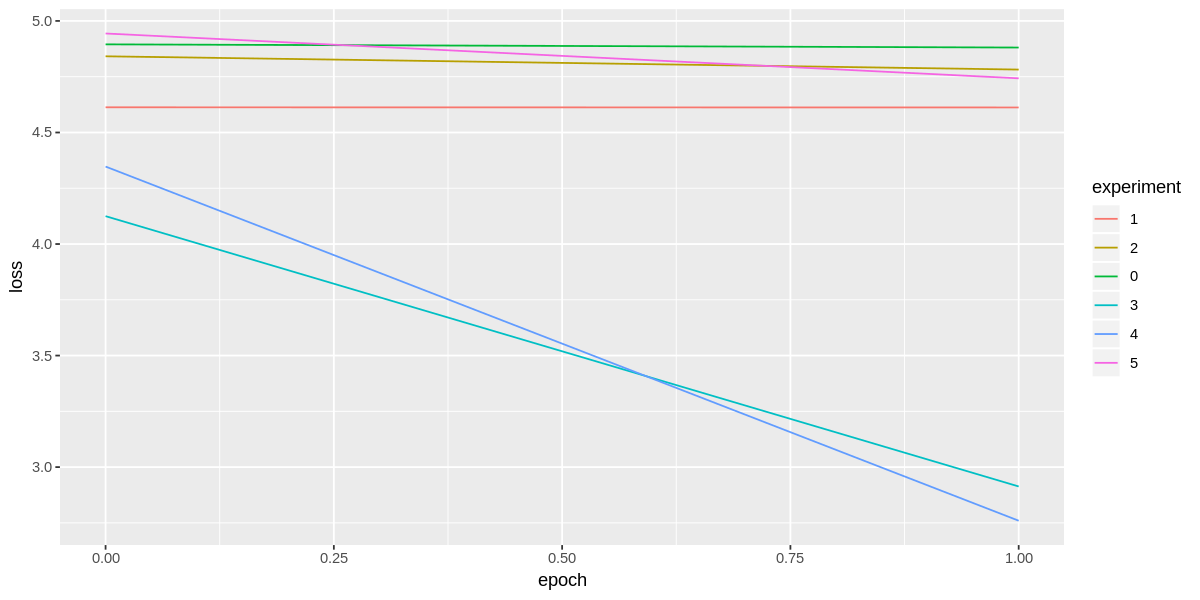

In [4]:
experiments %>% 
ggplot(aes(epoch, loss, color = experiment)) + 
geom_line()

In [5]:
lr <- lm(training_time ~ layers + hidden_dim + embedding_dim, data = experiments)
lr %>% summary()


Call:
lm(formula = training_time ~ layers + hidden_dim + embedding_dim, 
    data = experiments)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7535 -4.5537  0.1349  4.8620  6.1754 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     6.7840     7.9823   0.850  0.42009   
layers         10.5036     2.4054   4.367  0.00239 **
hidden_dim     -0.3331     0.8824  -0.378  0.71559   
embedding_dim  -0.4236     0.8953  -0.473  0.64877   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.936 on 8 degrees of freedom
Multiple R-squared:  0.7453,	Adjusted R-squared:  0.6497 
F-statistic: 7.801 on 3 and 8 DF,  p-value: 0.009244
